<a href="https://colab.research.google.com/github/Tloading4/PublicPortfolio/blob/main/BestNBAScorerProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/nba_player_season_avg")

# Preview the data
df.head()

,season,Rk,Player,Age,abrv_team,Pos,G,GS,MP,FG,...,AST,STL,BLK,TOV,PF,PTS,Awards,player_id,team_id,Team
0,2025,566,Jahlil Okafor,29,IND,C,1,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,201558932490,596533324764,Indiana Pacers
1,2025,126,Moritz Wagner,27,ORL,C,30,1.0,18.8,4.7,...,1.4,0.8,0.4,1.6,1.8,12.9,NaN,201804928675,440246278293,Orlando Magic
2,2025,127,Malcolm Brogdon,32,WAS,PG,24,13.0,23.5,4.3,...,4.1,0.5,0.2,1.6,1.3,12.7,NaN,201647396981,217488007283,Washington Wizards
3,2025,128,Scoot Henderson,20,POR,PG,66,10.0,26.7,4.3,...,5.1,1.0,0.2,2.7,2.7,12.7,NaN,202345245489,166747162988,Portland Trail Blazers
4,2025,129,Keldon Johnson,25,SAS,SF,77,0.0,23.9,4.8,...,1.6,0.6,0.3,1.0,1.5,12.7,NaN,201971008276,493725825651,San Antonio Spurs


In [12]:
#understanding the data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     28182 non-null  int64  
 1   Rk         28182 non-null  int64  
 2   Player     28182 non-null  object 
 3   Age        28182 non-null  int64  
 4   abrv_team  28182 non-null  object 
 5   Pos        27227 non-null  object 
 6   G          28182 non-null  int64  
 7   GS         22095 non-null  float64
 8   MP         27237 non-null  float64
 9   FG         28182 non-null  float64
 10  FGA        28182 non-null  float64
 11  FG%        28031 non-null  float64
 12  3P         22370 non-null  float64
 13  3PA        22370 non-null  float64
 14  3P%        18797 non-null  float64
 15  2P         22370 non-null  float64
 16  2PA        22370 non-null  float64
 17  2P%        22150 non-null  float64
 18  eFG%       22238 non-null  float64
 19  FT         28182 non-null  float64
 20  FTA   

In [13]:
df.describe()
df.columns



Index(['season', 'Rk', 'Player', 'Age', 'abrv_team', 'Pos', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'Awards', 'player_id', 'team_id', 'Team'],
      dtype='object')

In [14]:
features = ['PTS', 'MP', 'FGA', 'FG%', 'AST', 'TRB']
df_clean = df[features].dropna()

In [15]:
#dropping low min (bench) players
df_clean = df_clean[df_clean['MP'] >= 10]

In [16]:
corr = df_clean.corr()
corr['PTS'].sort_values(ascending=False)


,PTS
PTS,1.000000
FGA,0.972975
MP,0.863888
AST,0.556329
TRB,0.522636
FG%,0.262325


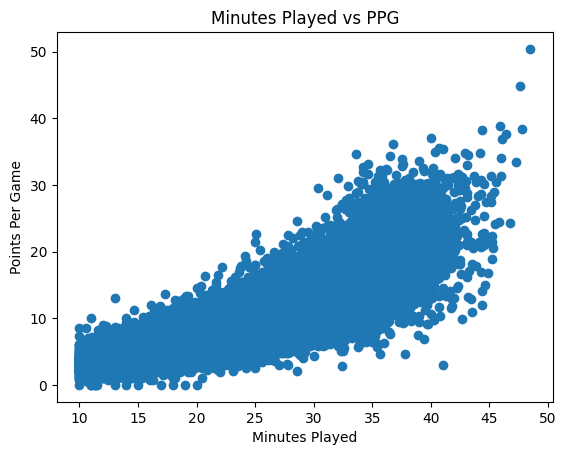

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df_clean['MP'], df_clean['PTS'])
plt.xlabel("Minutes Played")
plt.ylabel("Points Per Game")
plt.title("Minutes Played vs PPG")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

X = df_clean.drop(columns='PTS')
y = df_clean['PTS']

model = LinearRegression()
model.fit(X, y)

coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeffs

#Larger positive coefficient → stronger predictor of PPG, Volume stats usually dominate, Efficiency improves scoring but doesn’t replace opportunity
#A 1.0 increase in FG% (i.e., 100 percentage points) increases PPG by ~12 points. So a 0.10 increase (10%) ≈ +1.2 PPG. Efficiency matters a lot once a player is on the floor.

#Every additional shot attempt per game adds ~1.19 PPG. Players who shoot more → score more


,Feature,Coefficient
2,FG%,12.094419
1,FGA,1.190628
3,AST,0.070542
4,TRB,0.021232
0,MP,0.010082


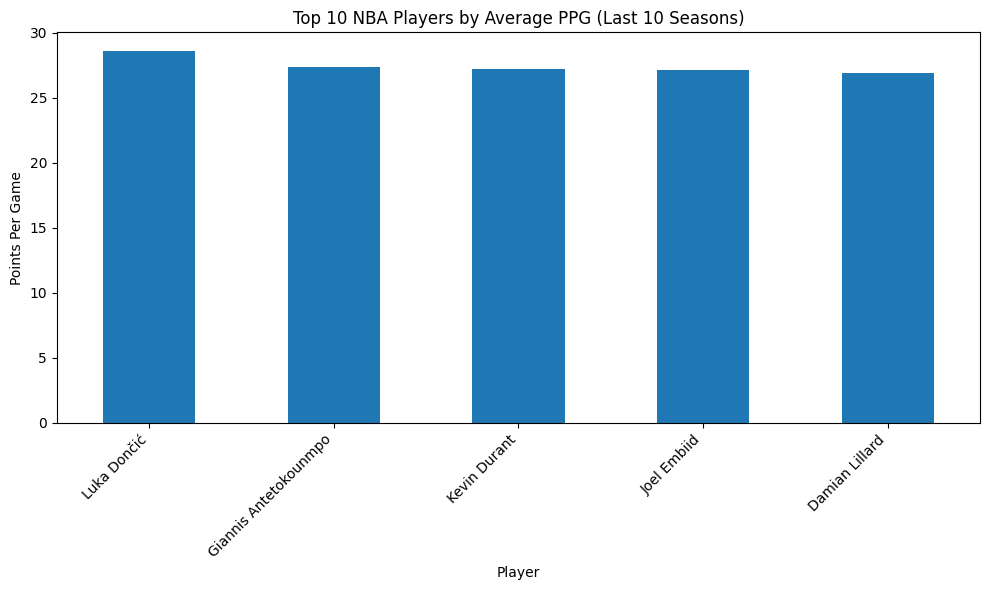

In [23]:
import matplotlib.pyplot as plt

# Extract starting year from season string
df['Start_Year'] = df['season'].astype(str).str[:4].astype(int)

# Keep last 10 seasons
recent_df = df[df['Start_Year'] >= df['Start_Year'].max() - 9]

# Group by player and compute average PPG over last 5 years
top_ppg = (
    recent_df
    .groupby('Player')['PTS']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10,6))
top_ppg.plot(kind='bar')
plt.title("Top 10 NBA Players by Average PPG (Last 10 Seasons)")
plt.ylabel("Points Per Game")
plt.xlabel("Player")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

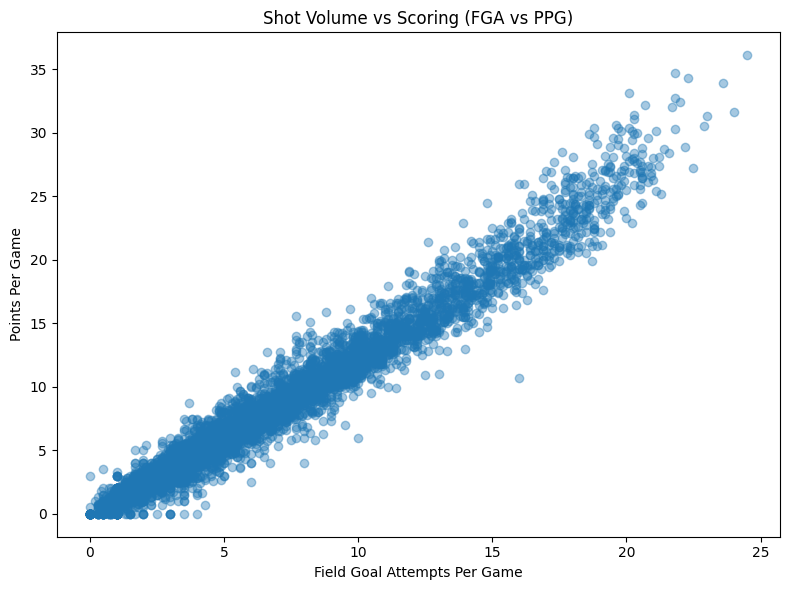

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(recent_df['FGA'], recent_df['PTS'], alpha=0.4)
plt.xlabel("Field Goal Attempts Per Game")
plt.ylabel("Points Per Game")
plt.title("Shot Volume vs Scoring (FGA vs PPG)")

plt.tight_layout()
plt.show()

#Players with higher scoring averages consistently take more shots per game.

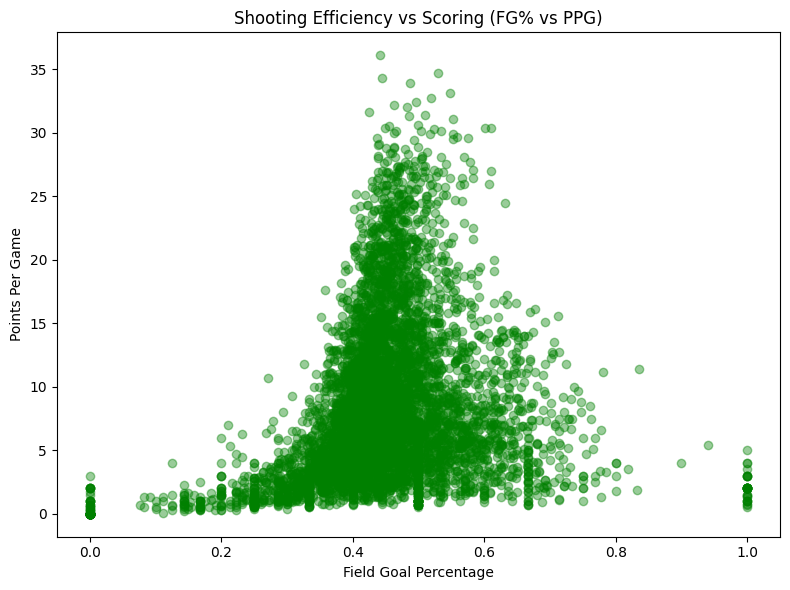

In [25]:
plt.figure(figsize=(8,6))

plt.scatter(recent_df['FG%'], recent_df['PTS'], alpha=0.4, color='green')
plt.xlabel("Field Goal Percentage")
plt.ylabel("Points Per Game")
plt.title("Shooting Efficiency vs Scoring (FG% vs PPG)")

plt.tight_layout()
plt.show()

#High-efficiency shooters convert volume into elite scoring averages.


In [ ]:
#The top scorers were first identified using average points per game over the last decade. To explain why these players rank highest, shot volume and shooting efficiency were analyzed.
 #The results show that elite scorers combine high field goal attempts with strong efficiency, confirming the regression findings that FGA and FG% are the strongest predictors of points per game.

In [26]:
df.columns
top_5_ppg = df.sort_values(by='PTS', ascending=False).head(5)

top_5_ppg[['Player', 'PTS', 'MP', 'FGA', 'FG%']]


,Player,PTS,MP,FGA,FG%
26094,Wilt Chamberlain,50.4,48.5,39.5,0.506
25855,Wilt Chamberlain,44.8,47.6,34.6,0.528
25721,Wilt Chamberlain,38.9,45.9,33.6,0.499
26181,Wilt Chamberlain,38.4,47.8,31.1,0.509
26097,Elgin Baylor,38.3,44.4,33.1,0.428


In [27]:
# Extract starting year from season string
df['Start_Year'] = df['season'].astype(str).str[:4].astype(int)

# Keep last 10 seasons
recent_df = df[df['Start_Year'] >= df['Start_Year'].max() - 9]

In [28]:
top_5_seasons = recent_df.sort_values(by='PTS', ascending=False).head(5)

top_5_seasons[['Player', 'season', 'PTS', 'MP', 'FGA', 'FG%']]

,Player,season,PTS,MP,FGA,FG%
4451,James Harden,2019,36.1,36.8,24.5,0.442
1222,Joel Embiid,2024,34.7,33.6,21.8,0.529
3849,James Harden,2020,34.3,36.5,22.3,0.444
1169,Luka Dončić,2024,33.9,37.5,23.6,0.487
1776,Joel Embiid,2023,33.1,34.6,20.1,0.548


In [29]:
#who are the best scores of the last decade
#To ensure relevance to modern NBA play, the analysis was limited to the most recent ten seasons.
#Players with limited playing time were excluded to reduce noise. The top scorers were identified based on average points per game across this period.

top_5_players = (
    recent_df
    .groupby('Player')['PTS']
    .mean()
    .round(1)
    .sort_values(ascending=False)
    .head(5)
)

top_5_players



,PTS
Player,
Luka Dončić,28.6
Giannis Antetokounmpo,27.4
Kevin Durant,27.2
Joel Embiid,27.1
Damian Lillard,26.9


In [ ]:
#Conclusion: Identifying the Top PPG Players (Last 10 Years)

#This analysis examined NBA player performance over the most recent ten seasons to determine which factors most strongly influence points per game (PPG).

#By limiting the dataset to modern seasons and excluding low-minute players, the analysis focused on meaningful, high-impact contributors.

#The results show that scoring output in the NBA is driven primarily by opportunity and efficiency, rather than by auxiliary box-score statistics.

#Specifically, players who score the most points per game tend to combine:

#High shooting volume (more shot attempts),

#Strong shooting efficiency

#Consistent playing time.

#While traditional statistics such as assists and rebounds contribute to overall player value, they play a much smaller role in directly predicting scoring output.

#Overall, the findings highlight that elite scorers are defined not only by how often they play, but by how frequently and how efficiently they are involved in offensive possessions.